In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#uploading and exploring the train dataset
train = pd.read_csv('/content/drive/MyDrive/Loan Eligibility Prediction/train_u6lujuX_CVtuZ9i.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#describing the dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#finding out how many missing values are present in the dataset
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [ ]:
#analysing how the credit history affects the loan status of an applicant
pd.crosstab(train['Credit_History'],train['Loan_Status'])
#we can see that an applicant with credit history of 1 are more eligible for loan than an applicant with credit history of 0.

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


array([[<Axes: title={'center': 'ApplicantIncome'}>]], dtype=object)

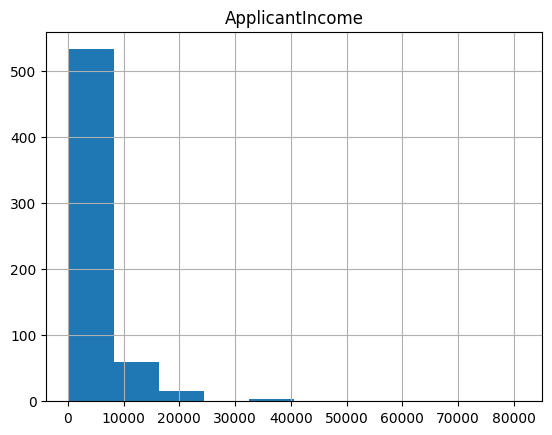

In [ ]:
#analysing how the applicant income affects the loan status of an applicant
train.hist(['ApplicantIncome'])
#we can see that the data is right skewed, which we have to later normalize

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

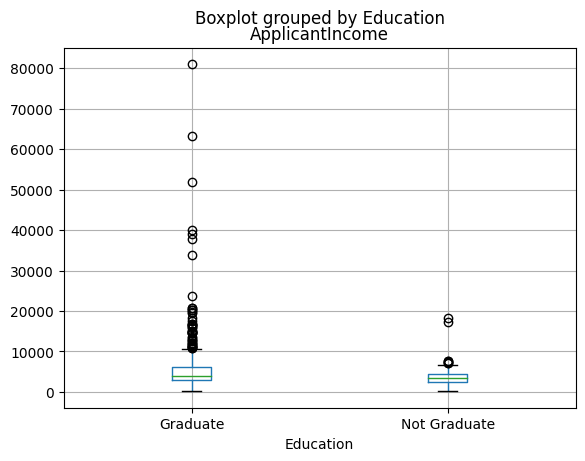

In [ ]:
#analysing how the applicant's income is related to education
train.boxplot(column='ApplicantIncome', by='Education')

array([[<Axes: title={'center': 'LoanAmount'}>]], dtype=object)

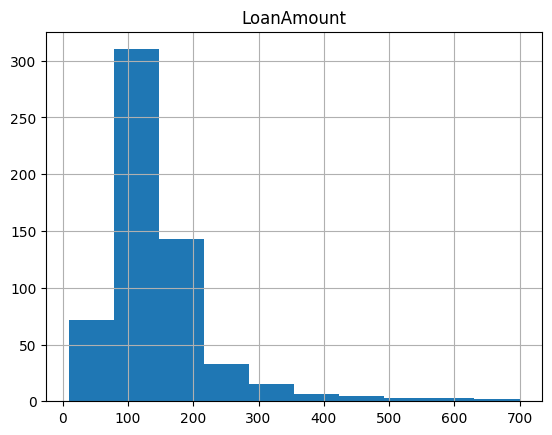

In [ ]:
#analysing how the loan amount affects the loan status of an applicant
train.hist(['LoanAmount'])
##we can see that the data is right skewed, which we have to later normalize


array([[<Axes: title={'center': 'LoanAmount_log'}>]], dtype=object)

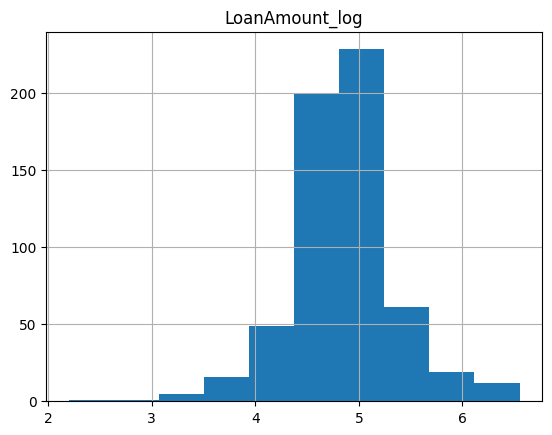

In [ ]:
#we have to normalize the features like ApplicantIncome and LoanAmount to improve the performance of the model, as normalizing will help put all the features on the same scale.
#for normalizing we apply the log function
train['LoanAmount_log']=np.log(train['LoanAmount'])
train.hist(['LoanAmount_log'])


array([[<Axes: title={'center': 'TotalIncome_log'}>]], dtype=object)

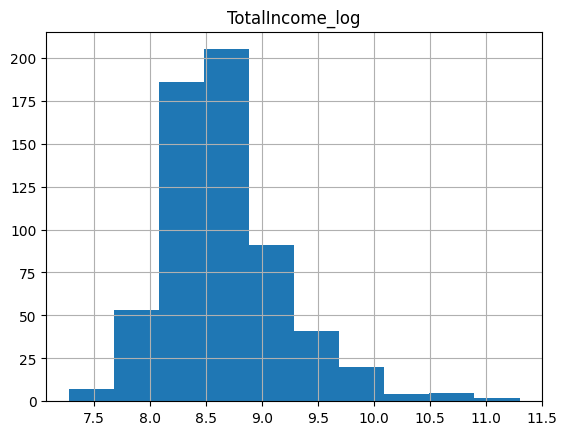

In [ ]:
#for normalizing we apply the log function
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome'] #we normalize the ApplicantIncome and CoapplicantIncome together as TotalIncome
train['TotalIncome_log']=np.log(train['TotalIncome'])
train.hist(['TotalIncome_log'])


In [ ]:
#filling out the null values in the dataset
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True) #since Gender is a categorical data we use mode function to fill the null values and inplace function to replace the null values with mode value
train['Married'].fillna(train['Married'].mode()[0],inplace=True) #same goes for Married
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True) #same goes for Dependents
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True) #same goes for Self Employed
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True) #same goes for Credit History
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True) #same goes for Loan Amount Term
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True) #since Loan Amount is a continuous data we use mean function to fill the null values and inplace function to replace the null values with mean value
train['LoanAmount_log'].fillna(train['LoanAmount_log'].mean(),inplace=True) #Loan Amount log is a continuos data we use mean function to fill the null values and inplace function to replace the null values with mean value

In [ ]:
#checking whether the missing values still exist or not
train.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_log         0
ApplicantIncome_log    0
TotalIncome            0
TotalIncome_log        0
dtype: int64

In [30]:
#Dividing the train dataset into dependent and independent variables
X = train.iloc[:,np.r_[1:5,9:11,13:15]].values
y = train.iloc[:,12].values
#values function will convert the selected column(s) into a NumPy array

In [31]:
#split the dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #set the random state to 0 to get same result every time a code runs.
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 7.992268643270745]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 9.328123407632566]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 8.280964400553373]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8.550047528287184]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 8.704999678440762]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 8.338066525518801]]


In [34]:
#convert the categorical data into numeric form using LabelEncoder
from sklearn.preprocessing import LabelEncoder
#create an instance for X
labelencoder_X = LabelEncoder()
for i in range(0,5):
  X_train[:,i]=labelencoder_X.fit_transform( X_train[:,i])
  X_train[:,7]=labelencoder_X.fit_transform( X_train[:,7])
print(X_train)

[[1 1 0 ... 1.0 4.875197323201151 103]
 [1 0 1 ... 1.0 5.278114659230517 386]
 [1 1 0 ... 0.0 5.003946305945459 214]
 ...
 [1 1 3 ... 1.0 5.298317366548036 286]
 [1 1 0 ... 1.0 5.075173815233827 319]
 [0 1 0 ... 1.0 5.204006687076795 231]]


In [36]:
#create an instance for y
labelencoder_y = LabelEncoder()
y_train=labelencoder_y.fit_transform( y_train)
print(y_train)

[1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1]


In [37]:
#do the same for test data
labelencoder_X = LabelEncoder()
for i in range(0,5):
  X_test[:,i]=labelencoder_X.fit_transform( X_test[:,i]) #the indices will remain same because the data is same for both train set and test set
  X_test[:,7]=labelencoder_X.fit_transform( X_test[:,7])
print(X_test)

[[1 0 0 0 5 1.0 4.430816798843313 96]
 [0 0 0 0 5 1.0 4.718498871295094 67]
 [1 1 0 0 5 1.0 5.780743515792329 88]
 [1 1 0 0 5 1.0 4.700480365792417 69]
 [1 1 2 0 5 1.0 4.574710978503383 31]
 [1 1 0 1 3 0.0 5.10594547390058 27]
 [1 1 3 0 3 1.0 5.056245805348308 93]
 [1 0 0 0 5 1.0 6.003887067106539 107]
 [1 0 0 0 5 0.0 4.820281565605037 79]
 [1 1 0 0 5 1.0 4.852030263919617 10]
 [0 0 0 0 5 1.0 4.430816798843313 36]
 [1 1 1 0 5 1.0 4.553876891600541 34]
 [0 0 0 0 5 1.0 5.634789603169249 100]
 [1 1 2 0 5 1.0 5.4638318050256105 78]
 [1 1 0 0 5 1.0 4.564348191467836 109]
 [1 1 1 0 5 1.0 4.204692619390966 61]
 [1 0 1 1 5 1.0 5.247024072160486 32]
 [1 0 0 1 5 1.0 4.882801922586371 15]
 [0 0 0 0 5 1.0 4.532599493153256 23]
 [1 1 0 1 5 0.0 5.198497031265826 20]
 [0 1 0 0 5 0.0 4.787491742782046 28]
 [1 1 0 0 5 1.0 4.962844630259907 19]
 [1 1 2 0 5 1.0 4.68213122712422 90]
 [1 1 2 0 5 1.0 5.10594547390058 100]
 [1 1 0 0 5 1.0 4.060443010546419 17]
 [1 1 1 0 5 1.0 5.521460917862246 87]
 [1 0 0 0 

In [38]:
labelencoder_y = LabelEncoder()
y_test=labelencoder_y.fit_transform( y_test)
print(y_test)

[1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1]


In [40]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)


In [47]:
#Now after all the data preprocessing has been done, we have to apply the Machine Learning Algorithm.
from sklearn.naive_bayes import GaussianNB
NbClassifier = GaussianNB()
NbClassifier.fit(X_train,y_train)
#check the accuracy of the algorithm
y_pred = NbClassifier.predict(X_test)
print(y_pred)
from sklearn import metrics
print('The accuracy of Naive Bayes Classification Model is: ', metrics.accuracy_score(y_pred,y_test))
#The accuracy is nearly 83%

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
The accuracy of Naive Bayes Classification Model is:  0.8292682926829268


In [48]:
#We have to check this algorithm on Test dataset to predict the outcome whether an applicant is eligible for loan or not.
test = pd.read_csv('/content/drive/MyDrive/Loan Eligibility Prediction/test_Y3wMUE5_7gLdaTN.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [49]:
#finding out how many missing values are present in the dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
#filling out the null values in the dataset
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)

In [51]:
#checking whether the missing values still exist or not
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

array([[<Axes: title={'center': 'TotalIncome_log'}>]], dtype=object)

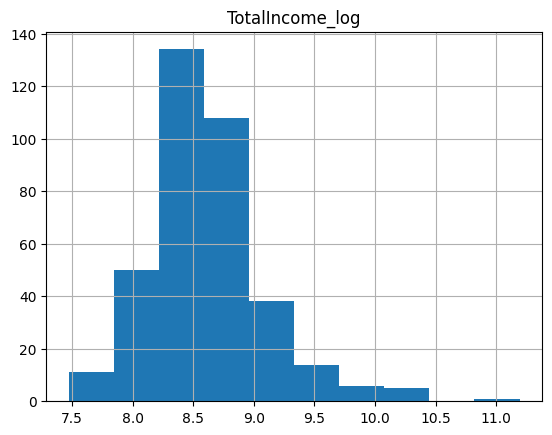

In [52]:
#for normalizing we apply the log function
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome'] #we normalize the ApplicantIncome and CoapplicantIncome together as TotalIncome
test['TotalIncome_log']=np.log(test['TotalIncome'])
test.hist(['TotalIncome_log'])

In [60]:
#converting the categorical data into numeric form using LabelEncoder
t = test.iloc[:,np.r_[1:5,9:11,12:14]].values #here we use 12:14 inplace of 13:15 becuase test dataset has only 14 columns so using 13:15 will throw IndexError: position indexers are out-of-bounds.
for i in range(0,5):
  t[:,i]=labelencoder_X.fit_transform( t[:,i])
  t[:,7]=labelencoder_X.fit_transform( t[:,7])
print(t)

[[1 1 0 ... 1.0 5720 207]
 [1 1 1 ... 1.0 4576 124]
 [1 1 2 ... 1.0 6800 251]
 ...
 [1 0 0 ... 1.0 5243 174]
 [1 1 0 ... 1.0 7393 268]
 [1 0 0 ... 1.0 9200 311]]


In [62]:
#scaling the data
t = scale.fit_transform(t)

In [64]:
#Finally!!! let's predict the outcome
pred = NbClassifier.predict(t)
print(pred)
#Here 1 represents that a customer is eligible for the loan and 0 represents that a customer is not eligible for the loan.


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
